In [1]:
from transformers import SwinModel
import torch
from einops import rearrange
import os
from pathlib import Path
from src.seg_openseed import OpenSeeDSeg
from src.dataset import collate_fn
from src.dataset.nutrition5k_dataset import Nutrition5kDataset, make_dataset
from src.dataset import Metadata
from OpenSeeD.utils.visualizer import Visualizer

from detectron2.data import MetadataCatalog
from detectron2.utils.colormap import random_color
from detectron2.structures import BitMasks

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torchvision.transforms.functional import to_pil_image

metadatas_path = '/srv/datasets2/nutrition5k_dataset/metadata/dish_metadata_cafe1.csv'
imgs_dir = '/srv/datasets2/nutrition5k_dataset/imagery/realsense_overhead'
splits_path = '/srv/datasets2/nutrition5k_dataset/dish_ids/splits/depth_train_ids.txt'
splits_test_path = '/srv/datasets2/nutrition5k_dataset/dish_ids/splits/depth_test_ids.txt'
dataset = make_dataset(None,imgs_dir,metadatas_path,splits_path,splits_test_path)
dataloader = {x: DataLoader(dataset[x], batch_size=2, num_workers=8, shuffle=True if x == 'train' else False, collate_fn=collate_fn) for x in ['train','test']}

# model = SwinModel.from_pretrained("microsoft/swin-tiny-patch4-window7-224").cuda()

# inputs = image_processor(image, return_tensors="pt")

/home/parinayok/.pyenv/versions/miniconda3-latest/envs/nutrition5k/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'AutoImageProcessor' from 'transformers' (/home/parinayok/.pyenv/versions/miniconda3-latest/envs/nutrition5k/lib/python3.10/site-packages/transformers/__init__.py)

In [25]:
for batch in dataloader['train']:
    image = batch['rgb_img'].cuda()
    with torch.no_grad():
        outputs = model.forward(pixel_values=image,output_hidden_states=True)
    break

hidden_states = outputs.hidden_states

In [4]:
len(hidden_states)

5

In [5]:
for hidden in hidden_states:
  print(hidden.shape)

torch.Size([1, 10560, 96])
torch.Size([1, 2640, 192])
torch.Size([1, 660, 384])
torch.Size([1, 165, 768])
torch.Size([1, 165, 768])


In [11]:
352*480 / 4/4/4/4/4

165.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


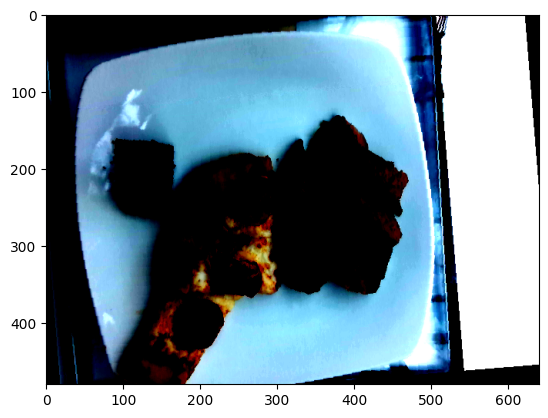

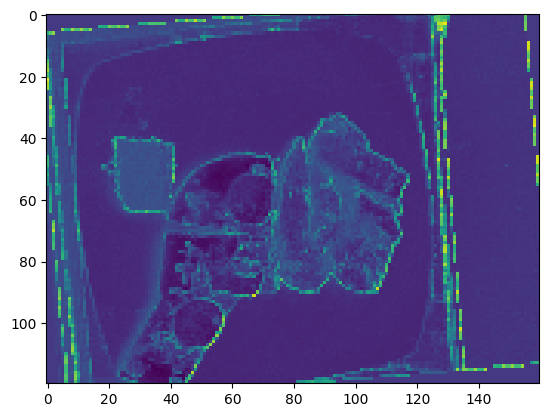

In [28]:
plt.figure()
plt.imshow(image[0].cpu().permute(1,2,0))
_, _, H, _ = image.shape
hid = rearrange(hidden_states[0],'b (h w) c -> b c h w', h=H//4)
plt.figure()
plt.imshow(hid[0].abs().mean(0).cpu())